In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import scipy.integrate as integrate
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
drilldf = pd.read_csv('./impactdrill.csv')

In [50]:
drilldf.head()

,Category Name,Unit,Price
0,Impact Drill,Piece,2
1,Impact Drill,Piece,675
2,Impact Drill,Piece,766
3,Impact Drill,Piece,900
4,Impact Drill,Piece,1000


In [51]:
units=drilldf['Unit'].unique()
units

array(['Piece', 'Piece(s)', 'pack', 'unit', 'Number', 'Unit', 'Pack',
       '1nos', 'Unit(s)', 'kit', 'Set', 'Pc_Onwards', 'ONWARDS', 'Kit'],
      dtype=object)

In [52]:
drilldf['Unit'].value_counts()

Piece         119
pack           47
unit           25
Unit           17
Number         14
Pack            9
Piece(s)        5
Pc_Onwards      5
Unit(s)         1
1nos            1
Set             1
kit             1
Kit             1
ONWARDS         1
Name: Unit, dtype: int64

In [54]:
drilldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
Category Name    247 non-null object
Unit             247 non-null object
Price            247 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [53]:
drilldf.describe()

,Price
count,247.000000
mean,6570.153846
std,9543.845737
min,2.000000
25%,2107.500000
50%,3098.000000
75%,6020.000000
max,55000.000000


In [78]:
npa=drilldf['Price']

In [79]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

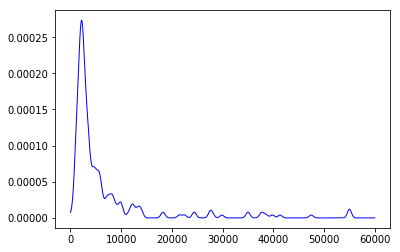

In [87]:
x_grid=np.linspace(0,60000,10000)
pdf = kde_scipy(npa, x_grid, bandwidth=400)
plt.plot(x_grid, pdf, color='blue', alpha=1, lw=1)
#plt.xlim([0,10000])

In [83]:
len(pdf)

1000

In [ ]:
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)

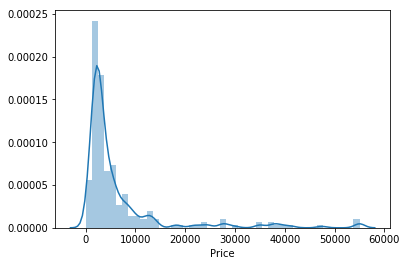

In [58]:
sns.distplot(drilldf['Price']);

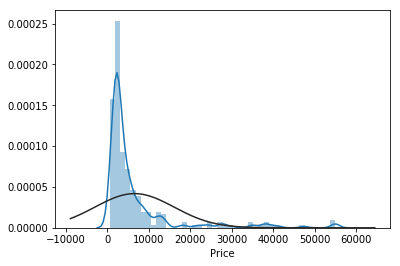

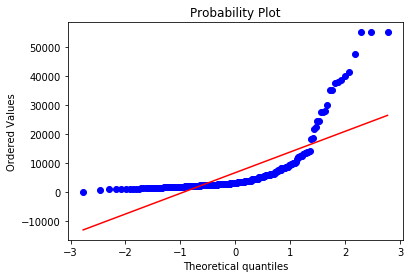

In [59]:
sns.distplot(drilldf['Price'][1:], fit=norm);
fig = plt.figure()
res = stats.probplot(drilldf['Price'], plot=plt)

In [60]:
array=np.arange(247)

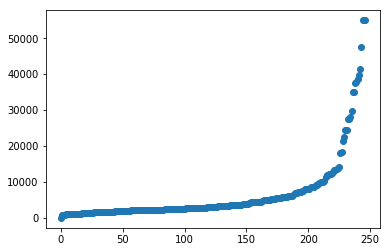

In [62]:
plt.scatter(array,drilldf['Price'])

(0, 10000)

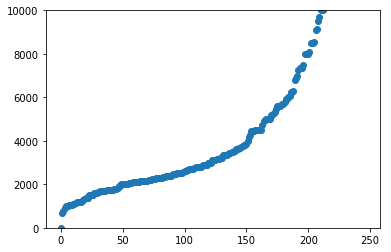

In [63]:
plt.scatter(array,drilldf['Price'])
plt.ylim([0,10000])

(10000, 20000)

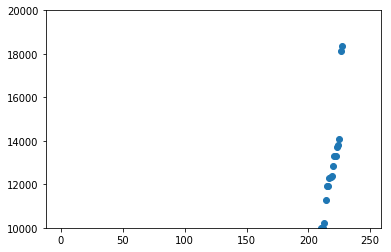

In [64]:
plt.scatter(array,drilldf['Price'])
plt.ylim([10000,20000])

(20000, 30000)

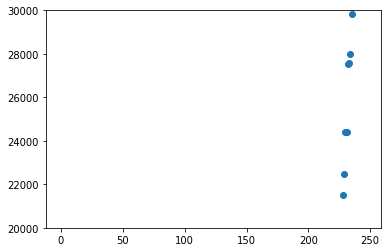

In [65]:
plt.scatter(array,drilldf['Price'])
plt.ylim([20000,30000])

(30000, 40000)

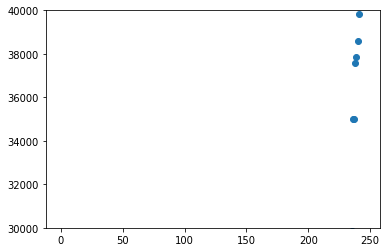

In [66]:
plt.scatter(array,drilldf['Price'])
plt.ylim([30000,40000])

(40000, 50000)

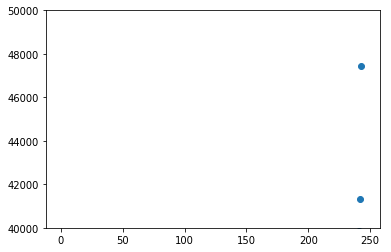

In [67]:
plt.scatter(array,drilldf['Price'])
plt.ylim([40000,50000])

(50000, 60000)

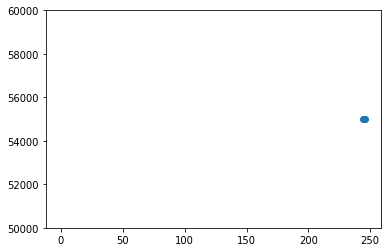

In [68]:
plt.scatter(array,drilldf['Price'])
plt.ylim([50000,60000])